In [7]:
# Instalar a biblioteca Kaggle
!pip install kaggle

# Fazer upload do arquivo kaggle.json
from google.colab import files
files.upload()  # Aqui, selecione o arquivo kaggle.json do seu computador

{}

In [15]:
# Configurar o arquivo kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset Arena Corinthians
!kaggle datasets download -d danilosoares/arena-corinthians --force
!unzip arena-corinthians.zip

Dataset URL: https://www.kaggle.com/datasets/danilosoares/arena-corinthians
License(s): copyright-authors
  0% 0.00/56.4k [00:00<?, ?B/s]
100% 56.4k/56.4k [00:00<00:00, 120MB/s]
Archive:  arena-corinthians.zip
replace A - Jogos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: A - Jogos.csv           
  inflating: B - Escalacoes.csv      
  inflating: C - Gols Marcados.csv   
  inflating: D - Gols Sofridos.csv   
  inflating: E - Jogadores.csv       


In [14]:
# Projeto 2 - Inteligência Artificial
## Dataset: Arena Corinthians (Kaggle)
#Este projeto implementa uma pipeline de aprendizado de máquina para prever resultados de partidas no estádio Arena Corinthians.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Carregando o dataset
df = pd.read_csv('/content/A - Jogos.csv')

In [20]:
## Estatísticas Descritivas

Estatísticas Descritivas do Dataset Arena Corinthians:
              JOGO RESULTADO  CORINTHIANS     GOL COR     GOL VIS  VISITANTE  \
count   321.000000       321          321  321.000000  321.000000        321   
unique         NaN         3            1         NaN         NaN         88   
top            NaN         V  CORINTHIANS         NaN         NaN  PALMEIRAS   
freq           NaN       189          321         NaN         NaN         19   
mean    161.000000       NaN          NaN    1.579439    0.732087        NaN   
std      92.808944       NaN          NaN    1.188781    0.819603        NaN   
min       1.000000       NaN          NaN    0.000000    0.000000        NaN   
25%      81.000000       NaN          NaN    1.000000    0.000000        NaN   
50%     161.000000       NaN          NaN    1.000000    1.000000        NaN   
75%     241.000000       NaN          NaN    2.000000    1.000000        NaN   
max     321.000000       NaN          NaN    6.000000    5.000000

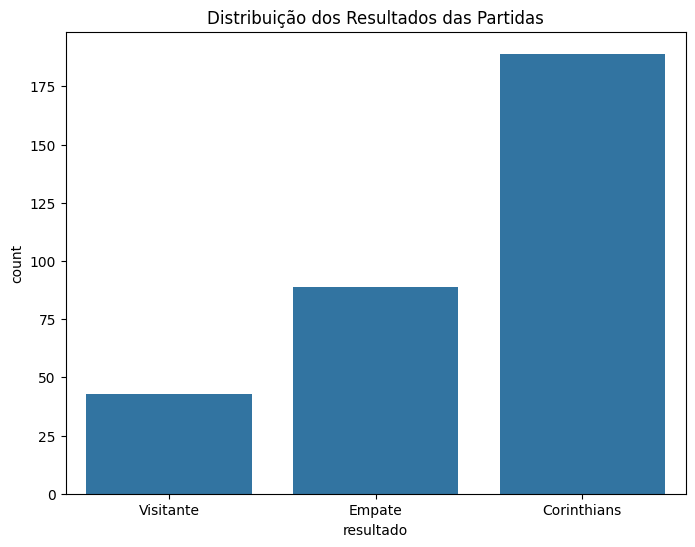

In [26]:
print("Estatísticas Descritivas do Dataset Arena Corinthians:")
print(df.describe(include='all'))
print("\nInformações gerais do dataset:")
print(df.info())
# Criar coluna de resultado com base nos gols
# Criar coluna de resultado com base nos gols
df['resultado'] = np.where(df['GOL COR'] > df['GOL VIS'], 'Corinthians',
                        np.where(df['GOL COR'] < df['GOL VIS'], 'Visitante', 'Empate'))

print("\nDistribuição dos resultados:")
print(df['resultado'].value_counts())

# Visualização
plt.figure(figsize=(8, 6))
sns.countplot(x='resultado', data=df)
plt.title('Distribuição dos Resultados das Partidas')
plt.show()

In [27]:
## Transformação nas Colunas: Codificação Categórica

In [29]:
# Codificação de variáveis categóricas

le_away = LabelEncoder()
le_home = LabelEncoder()
df['home_team_encoded'] = le_home.fit_transform(df['CORINTHIANS'])
df['away_team_encoded'] = le_away.fit_transform(df['VISITANTE'])
print("\nDados após codificação de home_team e away_team:")
print(df[['CORINTHIANS', 'home_team_encoded', 'VISITANTE', 'away_team_encoded']].head())


Dados após codificação de home_team e away_team:
   CORINTHIANS  home_team_encoded      VISITANTE  away_team_encoded
0  CORINTHIANS                  0    FIGUEIRENSE                 31
1  CORINTHIANS                  0       BOTAFOGO                 11
2  CORINTHIANS                  0  INTERNACIONAL                 42
3  CORINTHIANS                  0          BAHIA                  9
4  CORINTHIANS                  0      PALMEIRAS                 59


In [30]:
## Transformação nas Linhas: Remoção de Valores Ausentes

In [32]:
print("\nValores ausentes antes da remoção:")
print(df.isnull().sum())
df = df.dropna(subset=['PUBLICO', 'GOL COR', 'GOL VIS'])
print("\nDataset após remoção de valores ausentes:")
print(df.shape)


Valores ausentes antes da remoção:
JOGO                       0
RESULTADO                  0
CORINTHIANS                0
GOL COR                    0
GOL VIS                    0
VISITANTE                  0
CIDADE - VISITANTE         0
UF                         0
PAIS                       0
DIA                        0
MES                        0
ANO                        0
HORA                       0
DIA-SEMANA                 0
CAMPEONATO                 0
CAPITÃO                    0
TÉCNICO                    0
TÉCNICO - VISITANTE        0
PUBLICO                    0
RENDA                      0
CAMISA                     0
SAÍDA DE JOGO              0
1 TEMPO                    0
2 TEMPO                    0
ARTILHEIROS                0
ARTILHEIROS - VISITANTE    0
NUM-GOLS                   0
PRIMEIRO GOL               0
GOL-SUL                    0
GOL-NORTE                  0
GOL VIS-SUL                0
GOL VIS-NORTE              0
GOL-1T                     0
GOL-2T 

In [35]:
## Divisão dos Subconjuntos

In [36]:
features = ['home_team_encoded', 'away_team_encoded', 'PUBLICO']
X = df[features]
y = df['result']
# Divisão: 60% treino, 20% validação, 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
print("\nTamanhos dos subconjuntos:")
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")


Tamanhos dos subconjuntos:
Treino: (192, 3), Validação: (64, 3), Teste: (65, 3)


In [37]:
## Treinamento do Modelo

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("\nAcurácia no conjunto de validação:", val_accuracy)


Acurácia no conjunto de validação: 0.609375


In [39]:
## Avaliação do Modelo


Acurácia no conjunto de teste: 0.4461538461538462


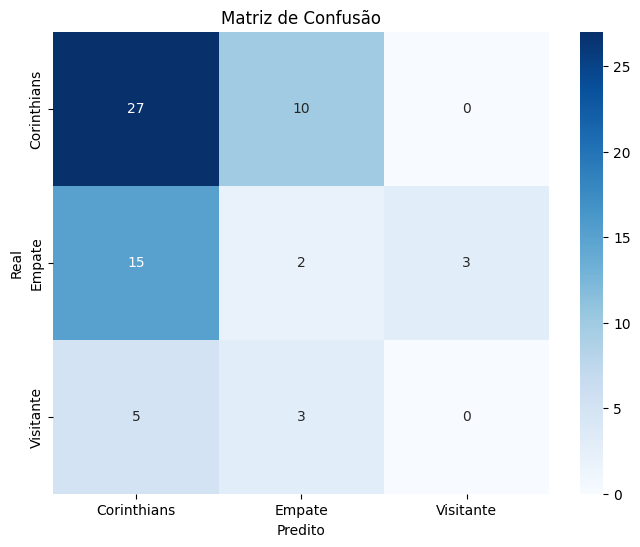


Relatório de Classificação:
              precision    recall  f1-score   support

 Corinthians       0.57      0.73      0.64        37
      Empate       0.13      0.10      0.11        20
   Visitante       0.00      0.00      0.00         8

    accuracy                           0.45        65
   macro avg       0.24      0.28      0.25        65
weighted avg       0.37      0.45      0.40        65



In [40]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nAcurácia no conjunto de teste:", test_accuracy)

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))

In [41]:
## Exemplo de Predição

In [42]:
exemplo = X_test.iloc[0:1]
predicao = model.predict(exemplo)
print("\nExemplo de predição:")
print(f"Dados da amostra:\n{exemplo}")
print(f"Classe predita: {predicao[0]}")
print(f"Classe real: {y_test.iloc[0]}")


Exemplo de predição:
Dados da amostra:
     home_team_encoded  away_team_encoded  PUBLICO
173                  0                 28   27.866
Classe predita: Corinthians
Classe real: Corinthians
